In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
pd.set_option('display.max_columns', None)

In [22]:
# dial the target models to True
run_flag = {'gpt35'       : True,
            'gpt4'        : False,
            'gpt4o'       : True,
            'gemini_old'  : False,
            'gemini'      : False,  #ultra
            'claude'      : True}   #sonnet

In [23]:
target_folder = 'transformed'

file_paths = {}
for model_name in run_flag.keys():
    file_paths[f'{model_name}_result_accuracy'] = f'{target_folder}/{model_name}_result_accuracy.xlsx'
    file_paths[f'{model_name}_result_justification'] = f'{target_folder}/{model_name}_result_justification.xlsx'

def load_from_excel(variable_name):
    if variable_name in file_paths:
        globals()[variable_name] = pd.read_excel(file_paths[variable_name])
        return variable_name, globals()[variable_name]
    else:
        print(f"File path for {variable_name} does not exist.")

accuracy_dfs = {}
justification_dfs = {}

# Load and save DataFrames based on the run flags
for model_name, flag in run_flag.items():
    if flag:
        accuracy_table_name = f"{model_name}_result_accuracy"
        justification_table_name = f"{model_name}_result_justification"
        
        # Load the DataFrames if they exist in file_paths
        accuracy_table_name, accuracy_table = load_from_excel(accuracy_table_name)
        justification_table_name, justification_table = load_from_excel(justification_table_name)

        accuracy_dfs[accuracy_table_name] = accuracy_table
        justification_dfs[justification_table_name] = justification_table

        print(f"loaded {accuracy_table_name}")
        print(f"loaded {justification_table_name}")


loaded gpt35_result_accuracy
loaded gpt35_result_justification
loaded gpt4o_result_accuracy
loaded gpt4o_result_justification
loaded claude_result_accuracy
loaded claude_result_justification


# TASK1: PROBABILITY OF COMPLETE CORRECT GUESS OF ALL FOUR DICHOTOMIES
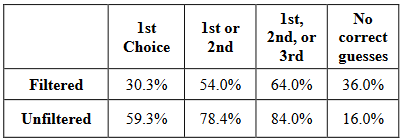

In [24]:
def calculate_accuracy_all (df):
    accuracy_all_cols = ['is matched 1st full', 'is matched 2nd full', 'is matched 3rd full']
    accuracy_all = df[accuracy_all_cols].copy()  # Make a copy to avoid SettingWithCopyWarning

    accuracy_all['1st'] = accuracy_all.iloc[:,0].astype(int)
    accuracy_all['1st or 2nd'] = np.where(accuracy_all.iloc[:,0] + accuracy_all.iloc[:,1] >= 1, 1, 0)
    accuracy_all['1st, 2nd, or 3rd'] = np.where(accuracy_all.iloc[:,0] + accuracy_all.iloc[:,1] + accuracy_all.iloc[:,2] >= 1, 1, 0)
    accuracy_all['no correct guess'] = np.where(accuracy_all.loc[:,'1st, 2nd, or 3rd'] == 0, 1, 0)

    accuracy_all_stmd = accuracy_all.iloc[:,3:]
    accuracy_all_dict = {}
    for col in accuracy_all_stmd.columns.tolist():
        result = round(accuracy_all_stmd[col].sum() / accuracy_all_stmd.shape[0],3)
        accuracy_all_dict[col] = result

    accuracy_all_table = pd.DataFrame([accuracy_all_dict])
    accuracy_all_table = accuracy_all_table.apply(lambda col: col.map(lambda x: f"{x * 100:.1f}%"))

    return accuracy_all_table

In [25]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if flag:
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_accuracy_all_table"
        
        globals()[new_variable_name] = calculate_accuracy_all (accuracy_df)

        print(f"calculation done for : {model_name}")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

calculation done for : gpt35
new variable created : gpt35_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  14.2%      21.8%            29.2%            70.8%

calculation done for : gpt4o
new variable created : gpt4o_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  24.8%      40.7%            51.0%            49.0%

calculation done for : claude
new variable created : claude_accuracy_all_table
     1st 1st or 2nd 1st, 2nd, or 3rd no correct guess
0  25.8%      42.3%            51.3%            48.7%



# TASK2: DICHOTOMY CLASSIFICATION ACCURACY ACROSS PARADIGMS
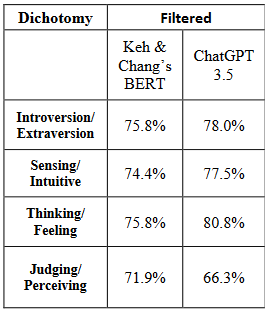

In [20]:
def calculate_accuracy_per_paradigm (df, LLM_name: str):
    selected_cols = ['is matched 1st (EI)',	'is matched 1st (NS)',	'is matched 1st (FT)',	'is matched 1st (JP)']
    accuracy_per_paradigm = df[selected_cols]

    accuracy_per_paradigm_dict = {}
    new_names = ['Introversion/Extraversion', 'Sensing/Intuitive', 'Thinking/Feeling', 'Judging/Perceiving']
    for i, col in enumerate(selected_cols):
        result = round(accuracy_per_paradigm[col].sum() / accuracy_per_paradigm.shape[0],3)
        accuracy_per_paradigm_dict[new_names[i]] = result

    accuracy_per_paradigm_table = pd.DataFrame(list(accuracy_per_paradigm_dict.items()), columns=['paradigm', LLM_name])
    accuracy_per_paradigm_table[LLM_name] = accuracy_per_paradigm_table[LLM_name].apply(lambda x: f"{x * 100:.1f}%")
    
    return accuracy_per_paradigm_table

In [26]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if flag:
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_accuracy_per_paradigm_table"
        
        globals()[new_variable_name] = calculate_accuracy_per_paradigm (accuracy_df, model_name)

        print(f"calculation done for : {model_name}")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

calculation done for : gpt35
new variable created : gpt35_accuracy_per_paradigm_table
                    paradigm  gpt35
0  Introversion/Extraversion  62.9%
1          Sensing/Intuitive  50.0%
2           Thinking/Feeling  70.5%
3         Judging/Perceiving  53.1%

calculation done for : gpt4o
new variable created : gpt4o_accuracy_per_paradigm_table
                    paradigm  gpt4o
0  Introversion/Extraversion  74.8%
1          Sensing/Intuitive  57.2%
2           Thinking/Feeling  79.6%
3         Judging/Perceiving  61.4%

calculation done for : claude
new variable created : claude_accuracy_per_paradigm_table
                    paradigm claude
0  Introversion/Extraversion  78.8%
1          Sensing/Intuitive  58.2%
2           Thinking/Feeling  83.0%
3         Judging/Perceiving  61.1%



# TASK3: CLASSIFICATION PRECISION, RECALL, AND FSCORE FOR EACH DICHOTOMY TYPE
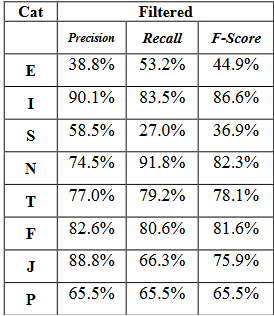

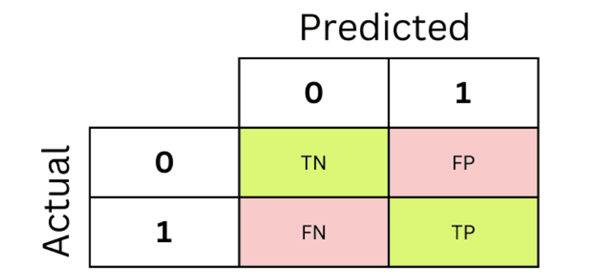

- precision: TP / (TP + FP)
- recall   : TP / (TP + FN)
- F1       : 2 * precision * recall / (precision + recall)

In [33]:
def find_confusion_matrix (df):
    full_paradigm = [['E', 'I'], ['N', 'S'], ['F', 'T'], ['J', 'P']]
    selected_cols = ['type (EI)', 'type (NS)', 'type (FT)', 'type (JP)', '1st choice (EI)', '1st choice (NS)', '1st choice (FT)', '1st choice (JP)']
    f1_per_paradigm = df[selected_cols]
    
    letters = []
    precision_list = []
    recall_list = []
    f1_list = []

    for i, paradigm in enumerate(full_paradigm):
        for j, letter in enumerate(full_paradigm[i]):
            true_stmd_df = f1_per_paradigm[f1_per_paradigm.iloc[:,i] == letter]
            false_stmd_df = f1_per_paradigm[f1_per_paradigm.iloc[:,i] != letter]
            
            true_act_data = true_stmd_df.iloc[:,i].values
            false_act_data = false_stmd_df.iloc[:,i].values

            true_pred_data = true_stmd_df.iloc[:,i + len(full_paradigm)].values
            false_pred_data = false_stmd_df.iloc[:,i + len(full_paradigm)].values

            tp = (true_act_data == true_pred_data).sum()
            tn = (false_act_data == false_pred_data).sum()
            fp = (false_act_data != false_pred_data).sum()
            fn = (true_act_data != true_pred_data).sum()

            precision = np.nan_to_num(tp / (tp + fp), 0)
            recall = np.nan_to_num(tp / (tp + fn), 0)
            #f1 = 2 * precision * recall / (precision + recall)
            f1 = np.nan_to_num((2 * tp) / (2 * tp + fp + fn), 0)

            letters.append(letter)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            print(f"{full_paradigm[i][j]} : tp [{tp}], fp [{fp}], fn [{fn}], precision [{round(precision,3)}], recall [{round(recall,3)}], f1 [{round(f1,3)}]")

    f1_per_paradigm_dict = {'Cat': letters,
                            'Precision': precision_list,
                            'Recall': recall_list,
                            'F-Score': f1_list}

    f1_per_paradigm_table = pd.DataFrame(f1_per_paradigm_dict)
    f1_per_paradigm_table[["Precision", "Recall", "F-Score"]] = f1_per_paradigm_table[["Precision", "Recall", "F-Score"]].apply(lambda x: (x * 100).map("{:.1f}%".format))
    
    return f1_per_paradigm_table

In [34]:
# Loop through the run flags
for accuracy_df_name, accuracy_df in accuracy_dfs.items():
    if flag:
        model_name = accuracy_df_name.split('_')[0]
        new_variable_name = f"{model_name}_fscore_per_paradigm"
        
        print(model_name)
        globals()[new_variable_name] = find_confusion_matrix (accuracy_df)

        print("")
        print(f"new variable created : {new_variable_name}")
        print(globals()[new_variable_name])
        print("")

gpt35
E : tp [248], fp [169], fn [61], precision [0.595], recall [0.803], f1 [0.683]
I : tp [142], fp [61], fn [169], precision [0.7], recall [0.457], f1 [0.553]
N : tp [307], fp [308], fn [2], precision [0.499], recall [0.994], f1 [0.665]
S : tp [3], fp [2], fn [308], precision [0.6], recall [0.01], f1 [0.019]
F : tp [196], fp [70], fn [113], precision [0.737], recall [0.634], f1 [0.682]
T : tp [241], fp [113], fn [70], precision [0.681], recall [0.775], f1 [0.725]
J : tp [26], fp [7], fn [284], precision [0.788], recall [0.084], f1 [0.152]
P : tp [303], fp [284], fn [7], precision [0.516], recall [0.977], f1 [0.676]

new variable created : gpt35_fscore_per_paradigm
  Cat Precision Recall F-Score
0   E     59.5%  80.3%   68.3%
1   I     70.0%  45.7%   55.3%
2   N     49.9%  99.4%   66.5%
3   S     60.0%   1.0%    1.9%
4   F     73.7%  63.4%   68.2%
5   T     68.1%  77.5%   72.5%
6   J     78.8%   8.4%   15.2%
7   P     51.6%  97.7%   67.6%

gpt4o
E : tp [230], fp [75], fn [82], precis